In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from prophet import Prophet
from sklearn.metrics import r2_score
import pickle

In [ ]:
data = pd.read_csv('cac40.csv', parse_dates = True)

In [ ]:
data.tail()

In [4]:
data.head()

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-


In [5]:
data_corr = data.corr()

<AxesSubplot:>

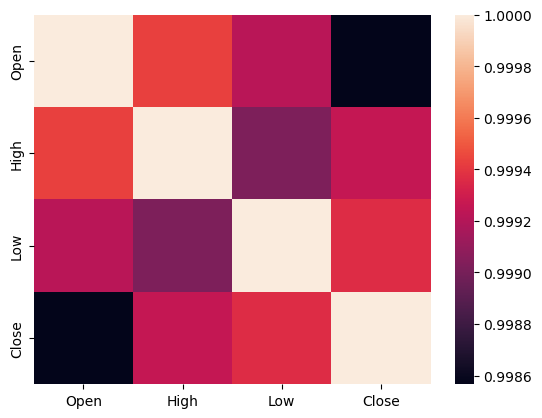

In [6]:
sns.heatmap(data_corr)

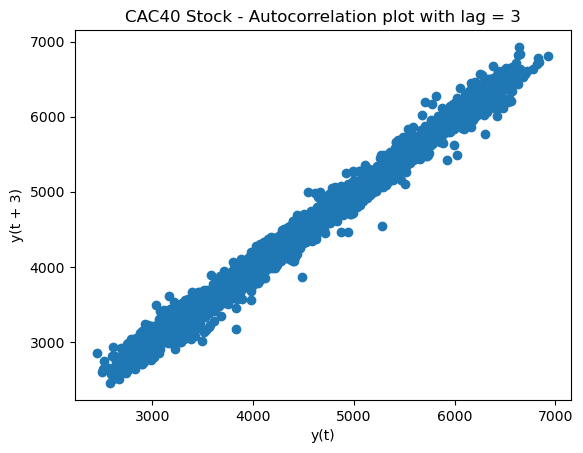

In [7]:
plt.figure()
lag_plot(data['Open'], lag=3)
plt.title('CAC40 Stock - Autocorrelation plot with lag = 3')
plt.show()

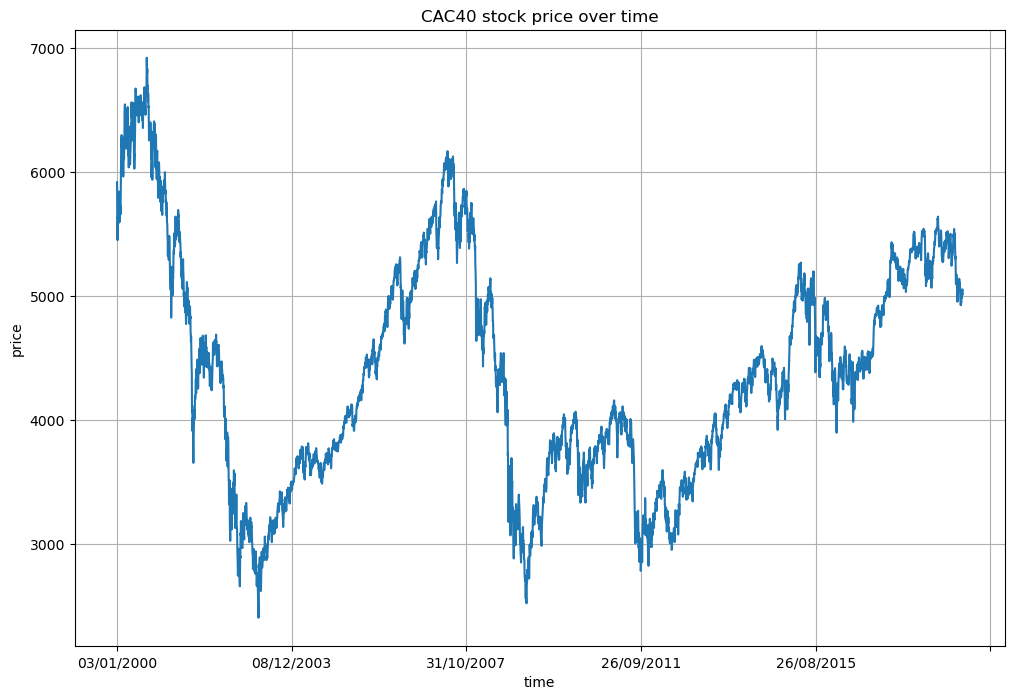

In [9]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.plot(data["Date"], data["Close"])
plt.title("CAC40 stock price over time")
plt.xlabel("time")
plt.ylabel("price")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

In [10]:
lens = data.shape[0]
end = int(0.8 * lens)
end

3872

In [11]:
train = data.iloc[:end]
test = data.iloc[end:]

In [12]:
train

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-
...,...,...,...,...,...,...
3867,17/02/2015,4720.93,4766.67,4683.19,4753.99,3509896125
3868,18/02/2015,4782.59,4806.68,4775.87,4799.03,4081249804
3869,19/02/2015,4788.40,4841.69,4770.17,4833.28,4161676152
3870,20/02/2015,4821.38,4837.93,4780.81,4830.90,5867868318


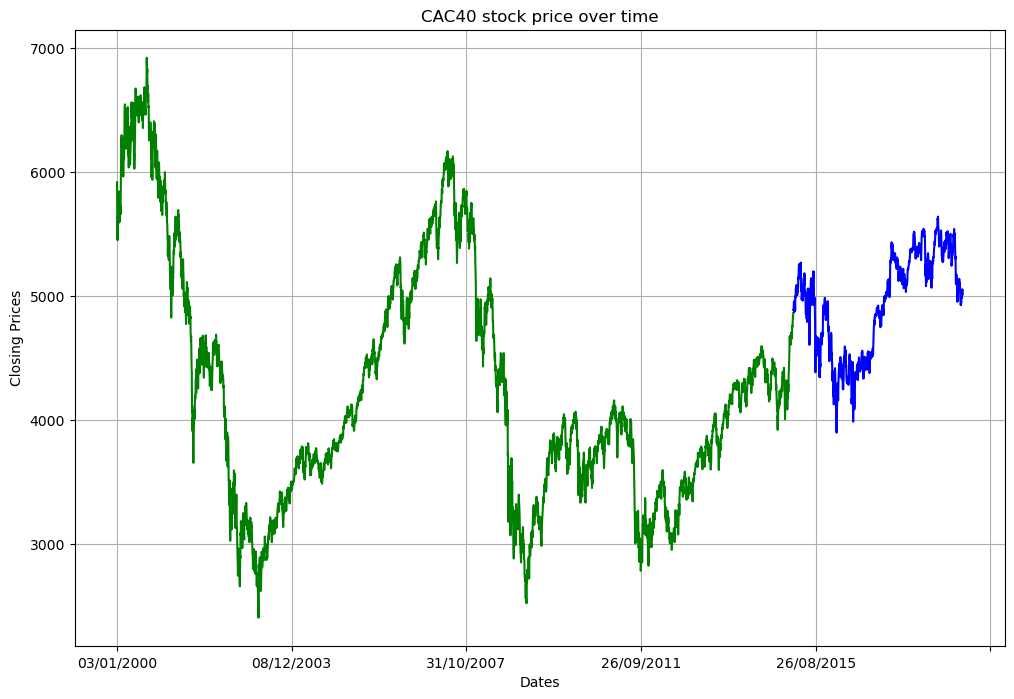

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.title("CAC40 stock price over time")
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train["Date"], train['Close'], 'green', label='Train data')
plt.plot(test["Date"], test['Close'], 'blue', label='Test data')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()


In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [15]:
stationarity(data['Close'])

Test Statistic: -2.1128559834484757
P-Value: 0.23937666710736993
Non-Stationary


In [16]:
data['First_Order_Difference'] = data['Close'] - data['Close'].shift(1)
data['Second_Order_Difference'] = data['First_Order_Difference'] - data['First_Order_Difference'].shift(1)

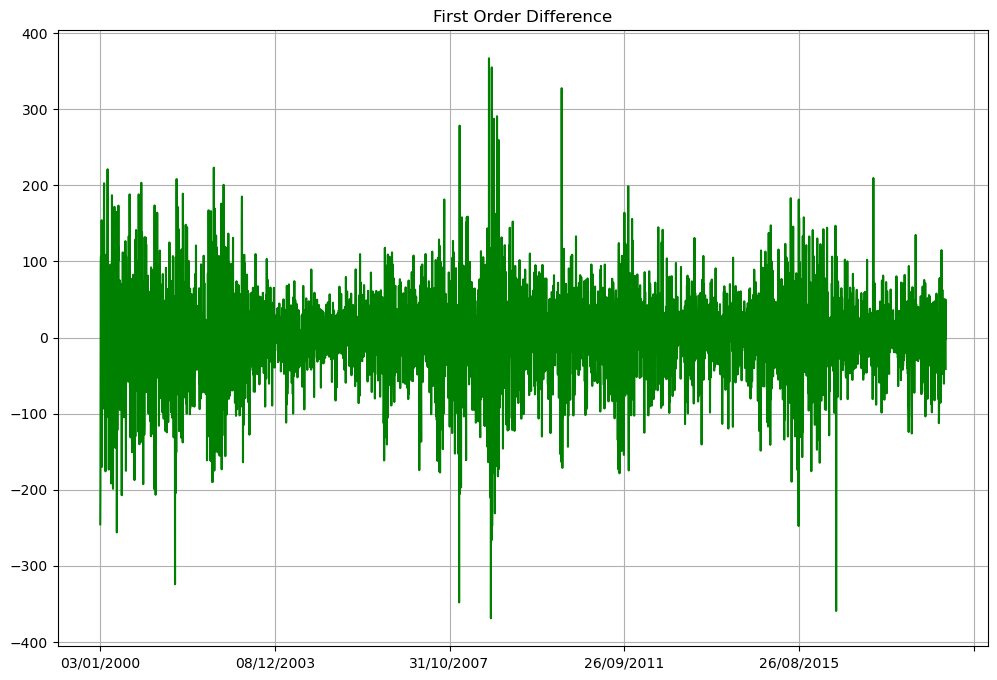

In [38]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.title("First Order Difference")
plt.plot(data["Date"], data['First_Order_Difference'], 'green', label='Train data')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

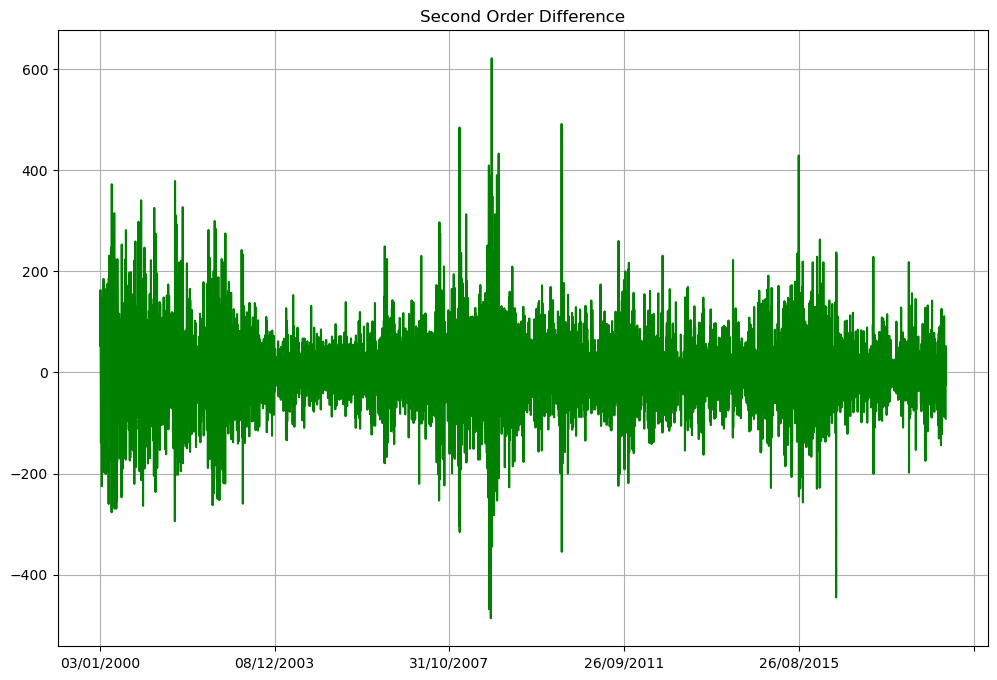

In [19]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid()
plt.title("Second Order Difference")
plt.plot(data["Date"], data['Second_Order_Difference'], 'green', label='Train data')
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

In [20]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\ppamr\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


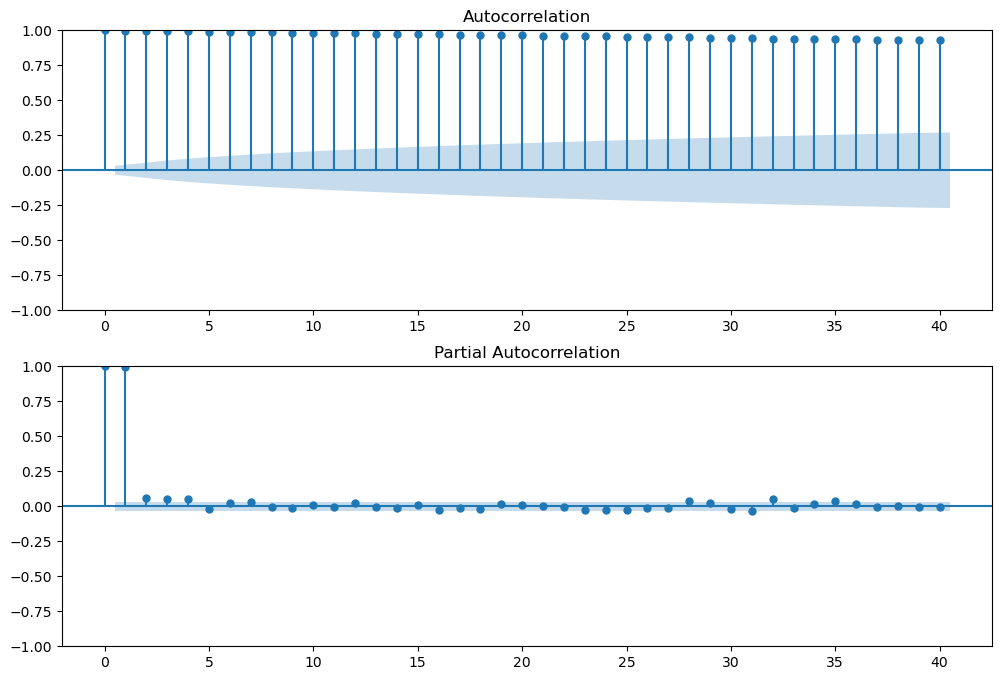

In [21]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'], lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Close'], lags=40, ax=ax2)

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model = ARIMA(train['Close'], order=(5, 1, 0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3872
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -21326.604
Date:                Wed, 24 May 2023   AIC                          42665.208
Time:                        19:47:47   BIC                          42702.776
Sample:                             0   HQIC                         42678.547
                               - 3872                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0412      0.012     -3.328      0.001      -0.066      -0.017
ar.L2         -0.0397      0.011     -3.564      0.000      -0.062      -0.018
ar.L3         -0.0483      0.011     -4.338      0.0

In [24]:
pred = model.forecast(steps=len(test))

In [25]:
history = [x for x in train['Close']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test['Close'][t + 3872]
    history.append(obs)

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(predictions, test['Close'])

0.9832169214994726

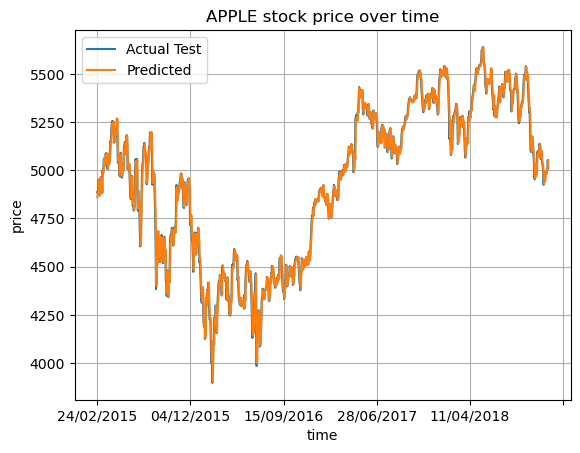

In [32]:
fig, ax = plt.subplots()
ax.grid()
plt.plot(test["Date"], test['Close'], label="Actual Test")
plt.plot(test["Date"], predictions, label="Predicted")
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.legend()
plt.show()

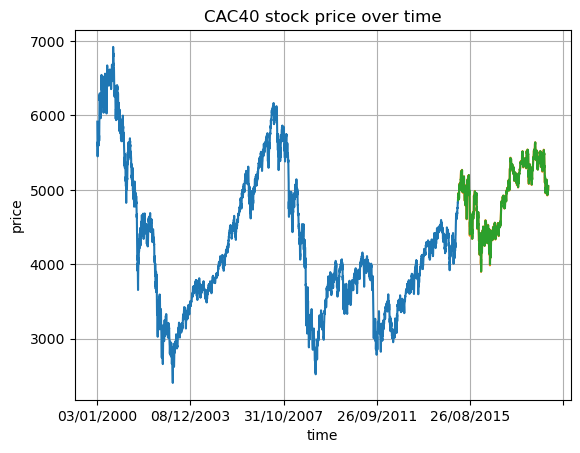

In [33]:
fig, ax = plt.subplots()
ax.grid()
plt.plot(train["Date"], train['Close'], label="Actual Train")
plt.plot(test["Date"], test['Close'], label="Actual Test")
plt.plot(test["Date"], predictions, label="Predicted")
plt.title("CAC40 stock price over time")
plt.xlabel("time")
plt.ylabel("price")
ax.xaxis.set_major_locator(plt.AutoLocator())
plt.show()

In [29]:
filename = 'model_pickle_cac40_arima.sav'
pickle.dump(model, open(filename, 'wb'))

In [44]:
pred = model.predict(start = len(data), end = len(data)+6, typ = 'levels')
pred

array([5012.22922128, 5010.75716656, 5012.61925798, 5010.22345699,
       5012.20732747, 5012.17924612, 5012.27167395])

In [36]:
history = [x for x in data['Close']]
predictions = []
for t in range(20):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    predictions.append(pred)
    history.append(pred)

In [37]:
predictions

[5012.229801887949,
 5010.757215452212,
 5012.619272351514,
 5010.223474454611,
 5012.207306002242,
 5012.179245480973,
 5012.271672487007,
 5012.10199428049,
 5012.220234980954,
 5012.126910612342,
 5012.133486789256,
 5012.127525624571,
 5012.139193204646,
 5012.133115499507,
 5012.137458505486,
 5012.1367796935,
 5012.13717540998,
 5012.136465945748,
 5012.136790736312,
 5012.136588164168]